In [2]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [3]:
seaborn.__version__
seaborn.set_context(context='talk', font_scale=1.2)

In [4]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [5]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,2008,AUS,Australia,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.29,7.0,8.18,6.0,8.73,4.0
1616,2008,DNK,Denmark,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.49,3.0,7.98,9.0,8.73,4.0
1617,2008,CHE,Switzerland,Western Europe,NaN,10.0,10.0,10.0,10.0,10.0,9.31,6.0,8.35,4.0,8.83,3.0
1618,2008,NZL,New Zealand,Oceania,NaN,10.0,10.0,10.0,10.0,10.0,9.42,4.0,8.46,3.0,8.94,2.0


# Parte 1
## 1. Estadísticos descriptivos
1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
3. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país 
con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los 
valores? ¿usamos el promedio? ¿usamos la mediana? 
2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la 
de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.
3. ¿Tiene sentido calcular la moda?
4. ¿Cómo pueden sanearse los valores faltantes?
5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por 
grupo? ¿Los eliminaría del conjunto de datos?


In [6]:
for i in range(4,len(dataset.columns)):
    nombre = dataset.columns[i]  
    rango = dataset[nombre].max() - dataset[nombre].min()
    print(dataset.columns[i],": \n",'Max: ',dataset[nombre].max(), 'Min: ',dataset[nombre].min(), 'Rango',  rango)

pf_identity_legal : 
 Max:  10.0 Min:  0.0 Rango 10.0
pf_identity_sex_male : 
 Max:  10.0 Min:  0.0 Rango 10.0
pf_identity_sex_female : 
 Max:  10.0 Min:  0.0 Rango 10.0
pf_identity_sex : 
 Max:  10.0 Min:  0.0 Rango 10.0
pf_identity_divorce : 
 Max:  10.0 Min:  0.0 Rango 10.0
pf_identity : 
 Max:  10.0 Min:  0.0 Rango 10.0
pf_score : 
 Max:  9.56 Min:  2.22 Rango 7.34
pf_rank : 
 Max:  162.0 Min:  1.0 Rango 161.0
ef_score : 
 Max:  9.11 Min:  2.58 Rango 6.529999999999999
ef_rank : 
 Max:  162.0 Min:  1.0 Rango 161.0
hf_score : 
 Max:  9.12 Min:  3.69 Rango 5.43
hf_rank : 
 Max:  162.0 Min:  1.0 Rango 161.0


In [17]:
from numpy import median, mean
print("Datos Globales pf_identity")
print()
print('median     ', dataset.pf_identity.median())
print(dataset.pf_identity.describe())




Datos Globales pf_identity

median      8.8
count    1540.000000
mean        7.280649
std         3.181577
min         0.000000
25%         5.000000
50%         8.800000
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64


In [7]:
print("Datos Globales hf_score")
print()
print('median     ', dataset.hf_score.median())
print(dataset.hf_score.describe())

print("---------------------")
print("Datos Latinoamerica hf_score")
print()
print('median    ', dataset[dataset.region == 'Latin America & the Caribbean'].hf_score.median())
print(dataset[dataset.region == 'Latin America & the Caribbean'].hf_score.describe())


Datos Globales hf_score

median      6.9
count    1540.000000
mean        6.978214
std         1.056239
min         3.690000
25%         6.280000
50%         6.900000
75%         7.880000
max         9.120000
Name: hf_score, dtype: float64
---------------------
Datos Latinoamerica hf_score

median     7.02
count    258.000000
mean       7.036977
std        0.634897
min        3.800000
25%        6.762500
50%        7.020000
75%        7.377500
max        8.180000
Name: hf_score, dtype: float64


Parte 4.3 y 4.4

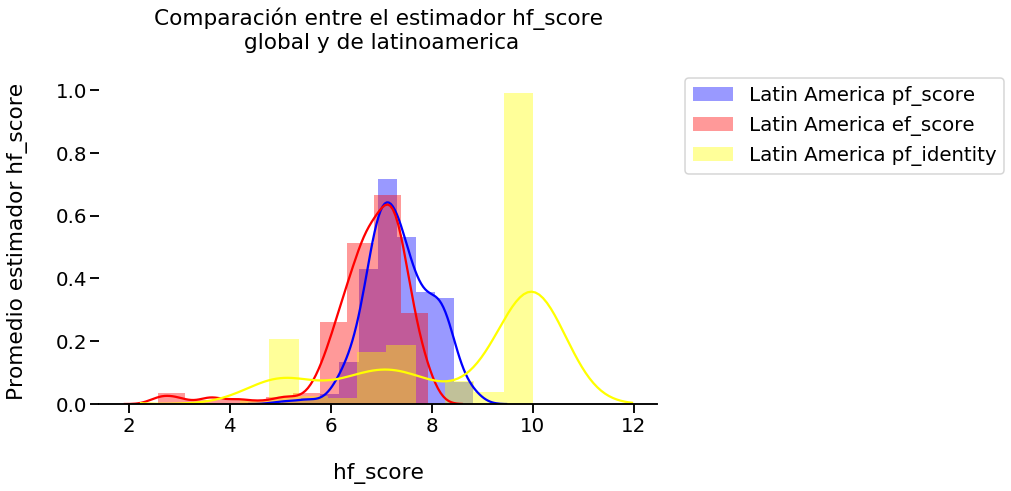

In [42]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset[dataset.region == 'Latin America & the Caribbean'].pf_score, label='Latin America pf_score', bins = 10, color = 'BLUE')
seaborn.distplot(dataset[dataset.region == 'Latin America & the Caribbean'].ef_score,
                 label='Latin America ef_score', bins = 10, color = 'RED')
seaborn.distplot(dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity,
                 label='Latin America pf_identity', bins = 10, color = 'yellow')
plt.legend()
plt.ylabel('Promedio estimador hf_score\n')
plt.xlabel('\nhf_score')
plt.title('Comparación entre el estimador hf_score\n global y de latinoamerica\n')
#plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine(left=True)

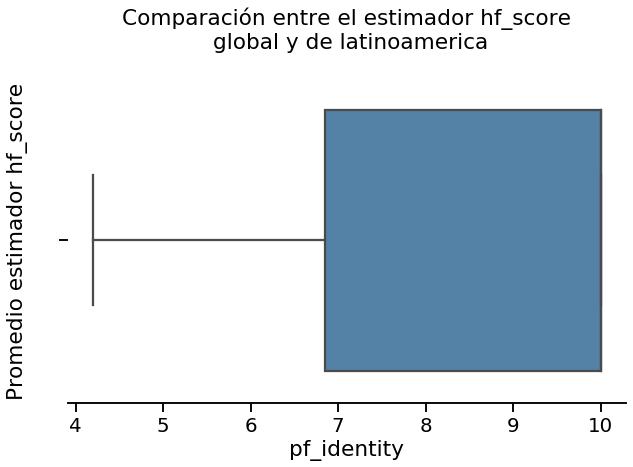

In [44]:
plt.figure(figsize=(10,6))
seaborn.boxplot(dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity, color = 'steelblue')
plt.ylabel('Promedio estimador hf_score\n')
plt.title('Comparación entre el estimador hf_score\n global y de latinoamerica\n')
seaborn.despine(left=True)

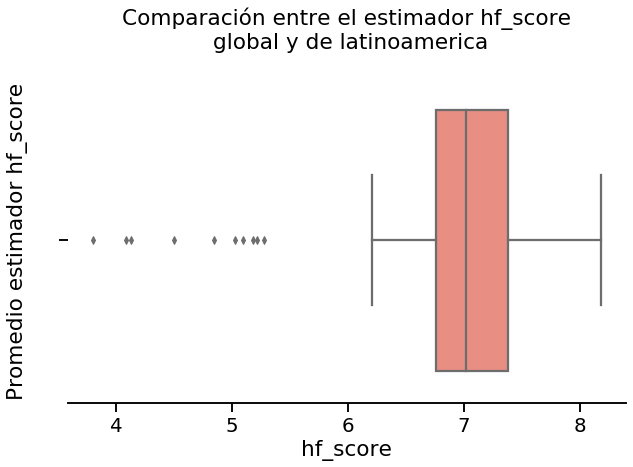

In [13]:
plt.figure(figsize=(10,6))
seaborn.boxplot(dataset[dataset.region == 'Latin America & the Caribbean'].hf_score, color = 'salmon')
plt.ylabel('Promedio estimador hf_score\n')
plt.title('Comparación entre el estimador hf_score\n global y de latinoamerica\n')
seaborn.despine(left=True)

Usamos la funcion describe() para tener informacion estadistica de las variables de interes y asi poder elegir correctamente los limites de los intervalos a crear al momento de convertir las variables pf_identity, ef_score y pf_score en variables categoricas.

In [98]:
pf_identity_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_identity
print()
print("Datos Latinoamerica pf_identity")
print()
print('median    ', pf_identity_LA.median())
print('max       ', pf_identity_LA.max())
print('min       ', pf_identity_LA.min())
print(pf_identity_LA.describe())
ef_score_LA = dataset[dataset.region == 'Latin America & the Caribbean'].ef_score
print("---------------------")
print()
print("Datos Latinoamerica ef_score")
print()
print('median    ', ef_score_LA.median())
print('max       ', ef_score_LA.max())
print('min       ', ef_score_LA.min())
print(ef_score_LA.describe())
pf_score_LA = dataset[dataset.region == 'Latin America & the Caribbean'].pf_score
print("---------------------")
print()
print("Datos Latinoamerica pf_score")
print()
print('median    ', pf_score_LA.median())
print('max       ', pf_score_LA.max())
print('min       ', pf_score_LA.min())
print(pf_score_LA.describe())


Datos Latinoamerica pf_identity

median     10.0
max        10.0
min        4.2
count    258.000000
mean       8.582171
std        1.875832
min        4.200000
25%        6.850000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64
---------------------

Datos Latinoamerica ef_score

median     6.905
max        7.93
min        2.58
count    258.000000
mean       6.725271
std        0.896733
min        2.580000
25%        6.432500
50%        6.905000
75%        7.287500
max        7.930000
Name: ef_score, dtype: float64
---------------------

Datos Latinoamerica pf_score

median     7.29
max        8.82
min        5.03
count    258.000000
mean       7.348333
std        0.633831
min        5.030000
25%        6.932500
50%        7.290000
75%        7.770000
max        8.820000
Name: pf_score, dtype: float64


Consecuentemente, pasamos a crear las variables categoricas creando intervalos considerando los datos estadisticos obtenidos para obtener una densidad de puntos coherente entre los intervalos.

In [108]:
pf_identity_LA = pf_identity_LA[~pf_identity_LA.isnull()]
i1 = pf_identity_LA.min()
i2 = pf_identity_LA.mean() - 0.75 * pf_identity_LA.std()
i3 = pf_identity_LA.mean() + 0.75 * pf_identity_LA.std()
i4 = pf_identity_LA.max()
intervals = [i1 , i2, i3, i4]
pf_identity_LA_segment = pandas.cut(pf_identity_LA, bins = intervals, labels = ["low", "medium", "high"])
exp1 = pandas.crosstab(pf_identity_LA, pf_identity_LA_segment)
print('Categorica pf_identity')
print()
print(intervals)
print(exp1)
print('--------------------------------------------------------------------------------------')
print()
ef_score_LA = ef_score_LA[~ef_score_LA.isnull()]
i1 = ef_score_LA.min()
i2 = ef_score_LA.mean() - 0.1 * ef_score_LA.std()
i3 = ef_score_LA.mean() + 0.5 * ef_score_LA.std()
i4 = ef_score_LA.max()
intervals = [i1 , i2, i3, i4]
ef_score_LA_segment = pandas.cut(ef_score_LA, bins = intervals, labels = ["low", "medium", "high"])
exp2 = pandas.crosstab(ef_score_LA, ef_score_LA_segment)
print('Categorica ef_score_LA')
print()
print(intervals)
print(exp2)
print('--------------------------------------------------------------------------------------')
pf_score_LA = pf_score_LA[~pf_score_LA.isnull()]
i1 = pf_score_LA.min()
i2 = pf_score_LA.mean() - 0.5 * pf_score_LA.std()
i3 = pf_score_LA.mean() + 0.5* pf_score_LA.std()
i4 = pf_score_LA.max()
intervals = [i1 , i2, i3, i4]
pf_score_LA_segment = pandas.cut(pf_score_LA, bins = intervals, labels = ["low", "medium", "high"])
exp3 = pandas.crosstab(pf_score_LA, pf_score_LA_segment)
print('Categorica pf_score_LA')
print()
print(intervals)
print(exp3)
print('--------------------------------------------------------------------------------------')
 

Categorica pf_identity

[4.2, 7.175296276921251, 9.989044808350066, 10.0]
pf_identity  low  medium  high
pf_identity                   
low           63       0     0
medium         0      45     0
high           0       0   148
--------------------------------------------------------------------------------------

Categorica ef_score_LA

[2.58, 6.635598060749539, 7.173637603229048, 7.93]
ef_score  low  medium  high
ef_score                   
low        83       0     0
medium      0      94     0
high        0       0    80
--------------------------------------------------------------------------------------
Categorica pf_score_LA

[5.03, 7.031417592322998, 7.665249074343667, 8.82]
pf_score  low  medium  high
pf_score                   
low        87       0     0
medium      0      92     0
high        0       0    78
--------------------------------------------------------------------------------------


Text(0.5, 1, 'Correlacion entre las variables categoricas \n de libertad economica y de identidad\n')

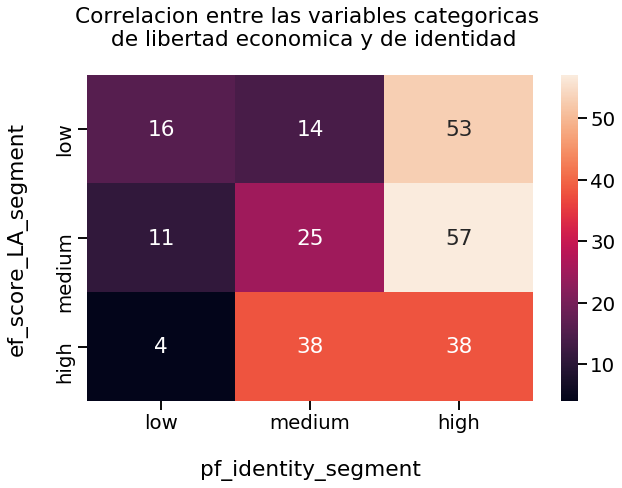

In [121]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(ef_score_LA_segment, pf_identity_segment)
seaborn.heatmap(exp, annot=True)
plt.ylabel('ef_score_LA_segment\n')
plt.xlabel('\npf_identity_segment')
plt.title('Correlacion entre las variables categoricas \n de libertad economica y de identidad\n')

En el grafico de arriba, podemos ver cualitativamente la correlacion entre las variables de libertad de identidad y de libertad economica. No habria una relacion aparente ya que los datos estan concentrados en el invarvalo alto de libertad de identidad aun contando con valores de libertad economica bajos

Text(0.5, 1, 'Correlacion entre las variables categoricas \n de libertad personal y de identidad\n')

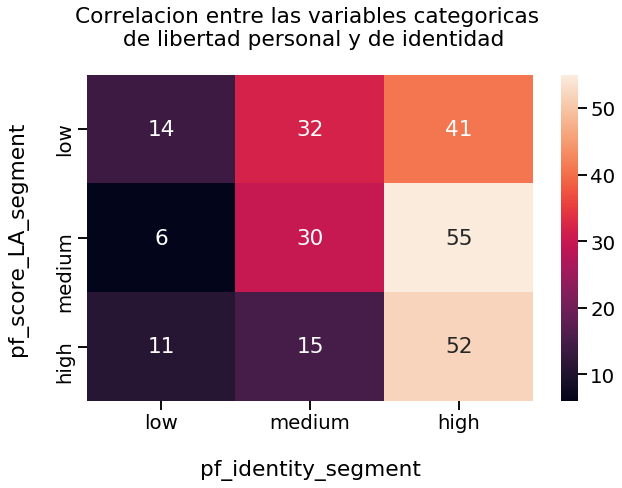

In [114]:
  plt.figure(figsize=(10,6))
exp = pandas.crosstab(pf_score_LA_segment, pf_identity_segment)
seaborn.heatmap(exp, annot=True)
plt.ylabel('pf_score_LA_segment\n')
plt.xlabel('\npf_identity_segment')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y de identidad\n')

En este grafico si podemos observar cierta relacion entre las variables de libertad de identidad y libertad personal ya que los datos estan concentrados en los invervalos medio y alto para ambas variables. Lo que indica que un valor alto de libertad de identidad conlleva a un valor alto de libertad personal

Text(0.5, 1, 'Correlacion entre las variables categoricas \n de libertad personal y economica\n')

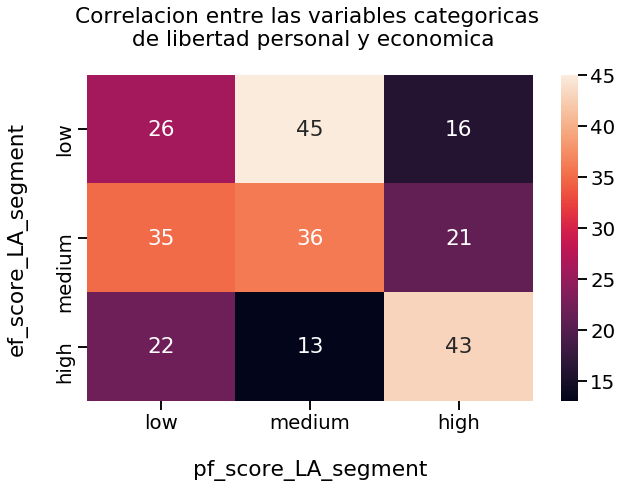

In [115]:
plt.figure(figsize=(10,6))
exp = pandas.crosstab(pf_score_LA_segment, ef_score_LA_segment)
seaborn.heatmap(exp, annot=True)
plt.ylabel('ef_score_LA_segment\n')
plt.xlabel('\npf_score_LA_segment')
plt.title('Correlacion entre las variables categoricas \n de libertad personal y economica\n')

En este ultimo grafico, se puede ver que hay pocos valores de intervalo alto de libertad personal para valores de intervalo bajo de libertad economica, y ademas hay concentracion de datos de intervalo alto en libertad personal correspondiente a intervalo tambien alto de libertad economica lo cual indicaria una cierta correlacion entre las variables. Sin embargo, no se puede apreciar claramente el tipo de dependencia.